In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
import pandas as pd
from matplotlib.colors import LogNorm
from glob import glob
import os
import importlib
import pyagn
importlib.reload(pyagn)
from pyagn import sed
import plotting
from qwind import constants, wind, radiation, aux_numba
importlib.reload(constants)
importlib.reload(wind)
importlib.reload(radiation)
importlib.reload(aux_numba)

<module 'qwind.aux_numba' from '/home/arnau/Documents/qwind/qwind/aux_numba.py'>

In [19]:
qw = wind.Qwind(M = 6.31e8, mdot = 0.72, radiation_mode = "QSOSED", nr = 60, n_cpus = 3)
#aux_numba.fraction_uv_list = qw.radiation.uv_fraction * np.ones(len(aux_numba.fraction_uv_list))

r_in: 8.408929 
 r_out: 1233.804581


8.408929380773936

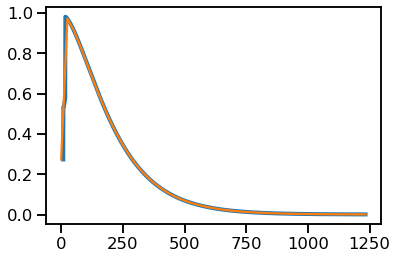

In [20]:
plt.plot(qw.radiation.r_range_interp, qw.radiation.uv_fraction_list, linewidth = 4)
r_range_test = np.linspace(0, qw.radiation.sed_class.gravity_radius)
c_interp = []
for r in r_range_test:
    c_interp.append(aux_numba.uv_fraction_lookup(r))
plt.plot(r_range_test, c_interp)
qw.radiation.r_in

In [21]:
qw.start_lines(niter = 50000)

Starting line iteration
multiple cpus
Failed wind! 




Failed wind! 




Failed wind! 




Failed wind! 




Failed wind! 




Failed wind! 




Failed wind! 




escape velocity reached.
Failed wind! 


Failed wind! 


Failed wind! 




Failed wind! 




Failed wind! 




Failed wind! 




Failed wind! 




Failed wind! 




Failed wind! 




Failed wind! 




Failed wind! 




out of grid 



Failed wind! 




Failed wind! 



Failed wind! 



Failed wind! 

Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 

Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 

Failed wind! 



Failed wind! 



Failed wind! 

Failed wind! 



Failed wind! 



Failed wind! 



(0, 1500)

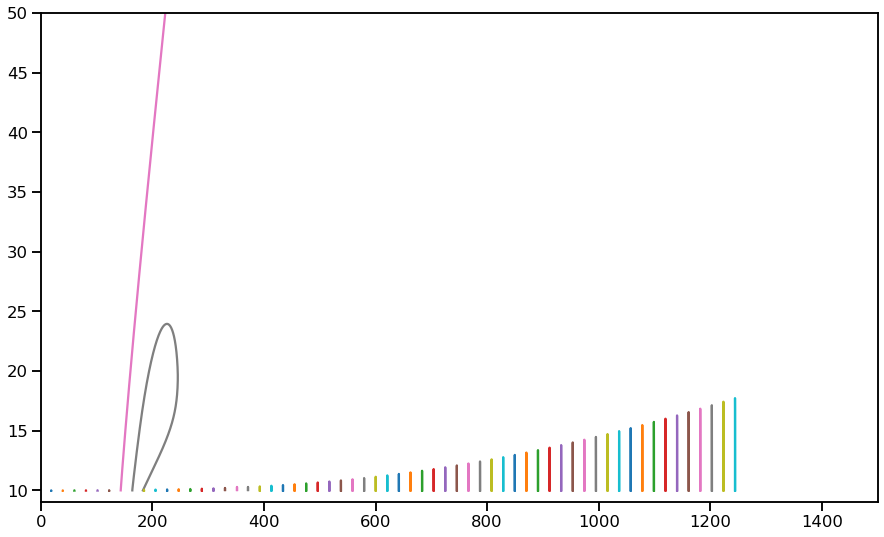

In [22]:
plt.figure(figsize = (15,9))
for line in qw.lines:
    plt.plot(line.r_hist, line.z_hist)
    
plt.ylim(9,50)
plt.xlim(0,1500)

In [5]:
old = wind.Qwind(M = 6.31e8, mdot = 0.72, radiation_mode = "SimpleSed", modes = ['old_sed'], n_cpus = 3)

r_in: 200.000000 
 r_out: 1600.000000


In [6]:
old.start_lines(niter = 50000)

Starting line iteration
multiple cpus
Failed wind! 




Failed wind! 




Failed wind! 




escape velocity reached.
Failed wind! 




Failed wind! 




out of grid 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



/home/arnau/Documents/qwind/qwind/aux_numba.py:184: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  phi_int = quad(integration_quad_r_phid, 0., np.pi, args=(r_d, r, z))[0]


Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 

Failed wind! 



Failed wind! 

Failed wind! 



In [16]:
lines = qw.lines
lines_old = old.lines

In [10]:
plt.figure(figsize=(15,8))
for line in lines:
    plt.plot(line.r_hist, line.z_hist, color = 'b')
for line_old in lines_old:
    plt.plot(line_old.r_hist, line_old.z_hist, color = 'r')
#plt.ylim(10,50)

NameError: name 'lines' is not defined

<Figure size 1080x576 with 0 Axes>

In [16]:
bh = sed.SED(M = 1e8, mdot = 0.5)

In [3]:
fraction_list = bh.compute_uv_fractions(1e26, include_corona=True)
r_range = np.linspace(bh.corona_radius, bh.gravity_radius, len(fraction_list))

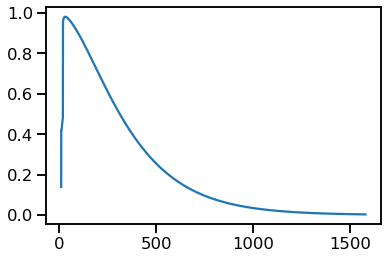

In [5]:
plt.plot(r_range, fraction_list)

In [6]:
from scipy import interpolate

In [9]:
interpol = interpolate.interp1d(x = r_range, y = fraction_list, fill_value = 0, bounds_error=False)

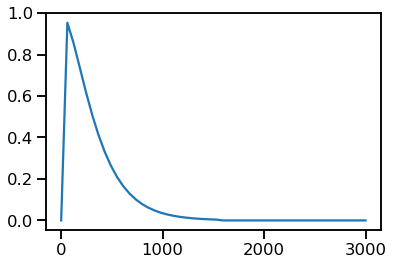

In [13]:
r_range_test = np.linspace(0, 3000)
plt.plot(r_range_test, interpol(r_range_test))